In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from scipy.optimize import curve_fit

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

###### Load entire Excel file

In [2]:
df = pd.read_excel('3D_Battery_Performance_Log.xls', sheet_name=None, header=[0, 1, 2])

###### Specific Excel sheet

In [3]:
df['1_Discharge (Cover2)'].head(5)

Paper # 14                   Paper # 31                               \
            set #8                       set #1                       set #2   
  Capacity (mAh/g) Voltage (V) Capacity (mAh/g) Voltage (V) Capacity (mAh/g)   
0         4.965905    3.759844        13.782550    3.223055         4.955569   
1        10.669414    3.660817        24.151907    3.169608        15.194221   
2        16.082465    3.554446        34.211732    3.106782        25.037697   
3        22.581061    3.496632        44.426323    3.063749        34.018971   
4        39.715057    3.384521        54.640914    3.034370        43.646897   

                    Paper # 32                                           \
                        set #1                       set #2               
  Voltage (V) Capacity (mAh/g) Voltage (V) Capacity (mAh/g) Voltage (V)   
0    3.381480         0.357306    1.922179         0.516464    1.856763   
1    3.369484         2.627373    1.695525         0.629378    1.788188   
2    3.310078         1.265333    1.831123         2.452121    1.673004   
3    3.237262         1.719346    1.796435         1.081031    1.752818   
4    3.195075         1.946353    1.773310         1.419771    1.722501   

                                
            set #3              
  Capacity (mAh/g) Voltage (V)  
0         0.480789    1.799430  
1         0.480789    1.770996  
2         0.708262    1.735927  
3         1.163210    1.692518  
4         2.950503    1.578659

###### Specific paper in a sheet

In [4]:
df['1_Discharge (Cover2)']['Paper # 32'].head(5)

set #1                       set #2                       set #3  \
  Capacity (mAh/g) Voltage (V) Capacity (mAh/g) Voltage (V) Capacity (mAh/g)   
0         0.357306    1.922179         0.516464    1.856763         0.480789   
1         2.627373    1.695525         0.629378    1.788188         0.480789   
2         1.265333    1.831123         2.452121    1.673004         0.708262   
3         1.719346    1.796435         1.081031    1.752818         1.163210   
4         1.946353    1.773310         1.419771    1.722501         2.950503   

               
  Voltage (V)  
0    1.799430  
1    1.770996  
2    1.735927  
3    1.692518  
4    1.578659

###### Specific set in a paper in a sheet

In [5]:
df['1_Discharge (Cover2)']['Paper # 32']['set #2'].head(7)

,Capacity (mAh/g),Voltage (V)
0,0.516464,1.856763
1,0.629378,1.788188
2,2.452121,1.673004
3,1.081031,1.752818
4,1.419771,1.722501
5,3.000557,1.645986
6,5.409374,1.600591


In [6]:
df['1_Discharge (Cover2)']['Paper # 32'].head(5)

set #1                       set #2                       set #3  \
  Capacity (mAh/g) Voltage (V) Capacity (mAh/g) Voltage (V) Capacity (mAh/g)   
0         0.357306    1.922179         0.516464    1.856763         0.480789   
1         2.627373    1.695525         0.629378    1.788188         0.480789   
2         1.265333    1.831123         2.452121    1.673004         0.708262   
3         1.719346    1.796435         1.081031    1.752818         1.163210   
4         1.946353    1.773310         1.419771    1.722501         2.950503   

               
  Voltage (V)  
0    1.799430  
1    1.770996  
2    1.735927  
3    1.692518  
4    1.578659

###### Reading in a specific sheet seems to work better (for now)

In [7]:
df = pd.read_excel('3D_Battery_Performance_Log.xls', sheet_name= '3_CapacityRate', header=[0, 1, 2])

In [8]:
df

Paper # 1                                              Paper #4  \
   set #1 E                   set #1 M                   set #1 E   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate   
0  0.026661       110.350768  0.287220        92.322541  0.048147   
1  0.147635        99.595634  0.566392        82.739099  0.121655   
2  0.279776        96.285964  0.836257        72.391035       NaN   
3  0.566392        85.000231  1.406232        52.891525       NaN   
4  0.838584        75.122293  2.810928        26.834216       NaN   
5  1.405767        57.791812  0.143316        94.650861       NaN   
6  2.810928        25.013564  0.035829       110.240547       NaN   

                                                                          \
                    set #2 E                   set #3 E                    
  Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate Capacity (mAh/g)   
0         0.355790  0.059551         0.363598  0.096021         0.364299   
1         0.170715  0.162193         0.128205       NaN              NaN   
2              NaN       NaN              NaN       NaN              NaN   
3              NaN       NaN              NaN       NaN              NaN   
4              NaN       NaN              NaN       NaN              NaN   
5              NaN       NaN              NaN       NaN              NaN   
6              NaN       NaN              NaN       NaN              NaN   

  Paper #11                                                        \
   Set #1 M                   Set #2 M                   Set #3 M   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate   
0  0.498656       151.746032  0.498656       151.746032  0.498656   
1  0.998656       145.396825  0.998656       145.396825  0.998656   
2  1.993280       134.285714  1.995968       136.825397  1.995968   
3       NaN              NaN       NaN              NaN       NaN   
4       NaN              NaN       NaN              NaN       NaN   
5       NaN              NaN       NaN              NaN       NaN   
6       NaN              NaN       NaN              NaN       NaN   

                                                                          \
                    Set #4 M                   Set #5 M                    
  Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate Capacity (mAh/g)   
0       151.746032  0.498656       151.746032  0.498656       151.746032   
1       144.444444  0.998656       144.444444  0.998656       145.396825   
2         5.714286  1.995968         7.936508  1.998656       130.158730   
3              NaN       NaN              NaN       NaN              NaN   
4              NaN       NaN              NaN       NaN              NaN   
5              NaN       NaN              NaN       NaN              NaN   
6              NaN       NaN              NaN       NaN              NaN   

                             Paper #17                             \
   Set #6 M                   set #1 E                   set #2 E   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate   
0  0.498656       151.746032  1.985336        18.301887  2.001908   
1  0.998656       144.444444  0.987609        62.075472  0.987609   
2  1.995968        14.285714  0.495388       125.849057  0.491288   
3       NaN              NaN  0.324213       142.830189  0.326919   
4       NaN              NaN  0.198534       149.622642  0.198534   
5       NaN              NaN  0.098761       153.018868  0.099585   
6       NaN              NaN  0.066821       153.396226  0.066267   

                                              Paper #19                   \
                    set #3 E                   set #1 E                    
  Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate Capacity (mAh/g)   
0        50.377358  0.196987       151.370093  4.907139       144.082902   
1       116.415094  1.968901       107.735849  2.964104       146.735751   
2       143.962264  0.98760

In [9]:
df.columns

MultiIndex([('Paper # 1', 'set #1 E',           'C rate'),
            ('Paper # 1', 'set #1 E', 'Capacity (mAh/g)'),
            ('Paper # 1', 'set #1 M',           'C rate'),
            ('Paper # 1', 'set #1 M', 'Capacity (mAh/g)'),
            ( 'Paper #4', 'set #1 E',           'C rate'),
            ( 'Paper #4', 'set #1 E', 'Capacity (mAh/g)'),
            ( 'Paper #4', 'set #2 E',           'C rate'),
            ( 'Paper #4', 'set #2 E', 'Capacity (mAh/g)'),
            ( 'Paper #4', 'set #3 E',           'C rate'),
            ( 'Paper #4', 'set #3 E', 'Capacity (mAh/g)'),
            ('Paper #11', 'Set #1 M',           'C rate'),
            ('Paper #11', 'Set #1 M', 'Capacity (mAh/g)'),
            ('Paper #11', 'Set #2 M',           'C rate'),
            ('Paper #11', 'Set #2 M', 'Capacity (mAh/g)'),
            ('Paper #11', 'Set #3 M',           'C rate'),
            ('Paper #11', 'Set #3 M', 'Capacity (mAh/g)'),
            ('Paper #11', 'Set #4 M',           'C rate'

#REFERENCES FOR MULTI-INDEXING

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

https://stackoverflow.com/questions/40554106/read-excel-sheet-with-multiple-header-using-pandas

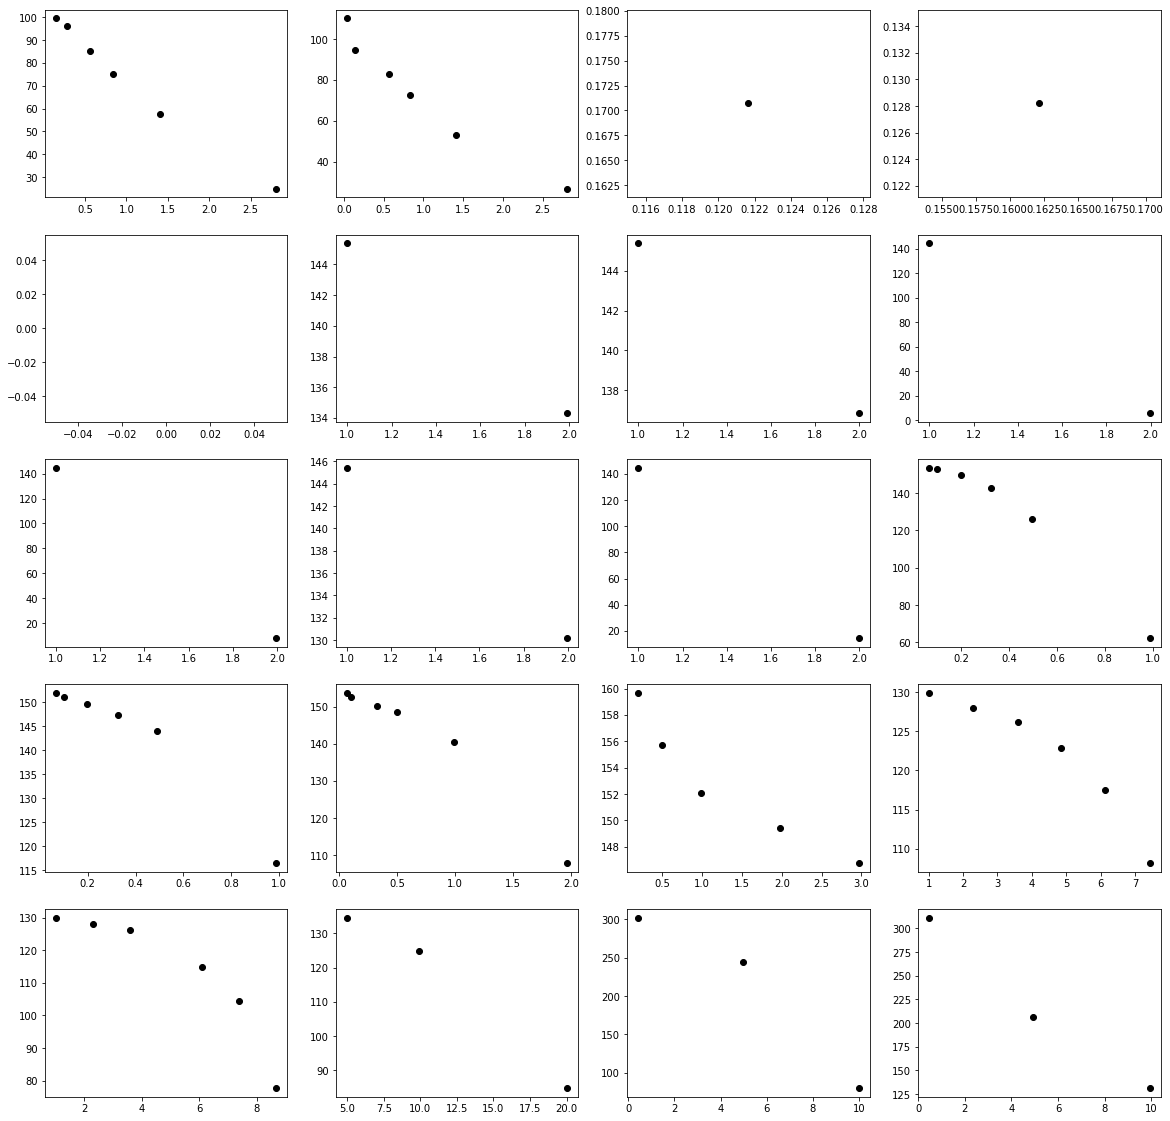

In [10]:
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(20,20))
#ax = fig.subplots(nrows=5,ncols=4)
#jet= plt.get_cmap('jet')
#colors = iter(jet(np.linspace(0,1,20)))

for i in range(int(len(df.columns)/2)):
    ax = plt.subplot(5, 4, i+1)
    ax.plot(df.iloc[:,2*i].values[1:],df.iloc[:,2*i+1].values[1:],color='k',marker='o', linewidth=0)
    #ax.set_xlim([0,40])
    #ax.set_ylim([0,200])
    #ax.set_xscale('log')
    #ax.set_yscale('log')

#### Define the Euqation to be fitted

In [11]:
def objective(R,t,n,Q):
    return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )

In [12]:
def par_std(t, n, Q, covariance):
    # summarize the parameter and standard deviation
    std = np.sqrt(np.diag(covariance))
    print('t = ' + f'{t:.3f}' + u'\u00B1' + f'{std[0]:.3f}')
    print('n = ' + f'{n:.3f}' + u'\u00B1' + f'{std[1]:.3f}')
    print('Q = ' + f'{Q:.3f}' + u'\u00B1' + f'{std[2]:.3f}')
    return

In [13]:
def plot_fit(R,y,t,n,Q):
    # plot data as scattered points
    plt.scatter(R, y)
    # define a sequence of x-axis point based on the limits of the data
    R_line = np.arange(0.5*min(R), 1.5*max(R), 0.01)
    # calculate y with the fitted equation
    y_line = objective(R_line, t, n, Q)
    # plot equation
    plt.plot(R_line, y_line, '--', color='red')
    return

<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  return Q*(1-( (R*t) ** n ) * (1 - np.exp(- ((R*t) ** (-n)) )) )
<ipython-input-11-26a65b54c072>:2: RuntimeWarning: invalid value encountered in power
  

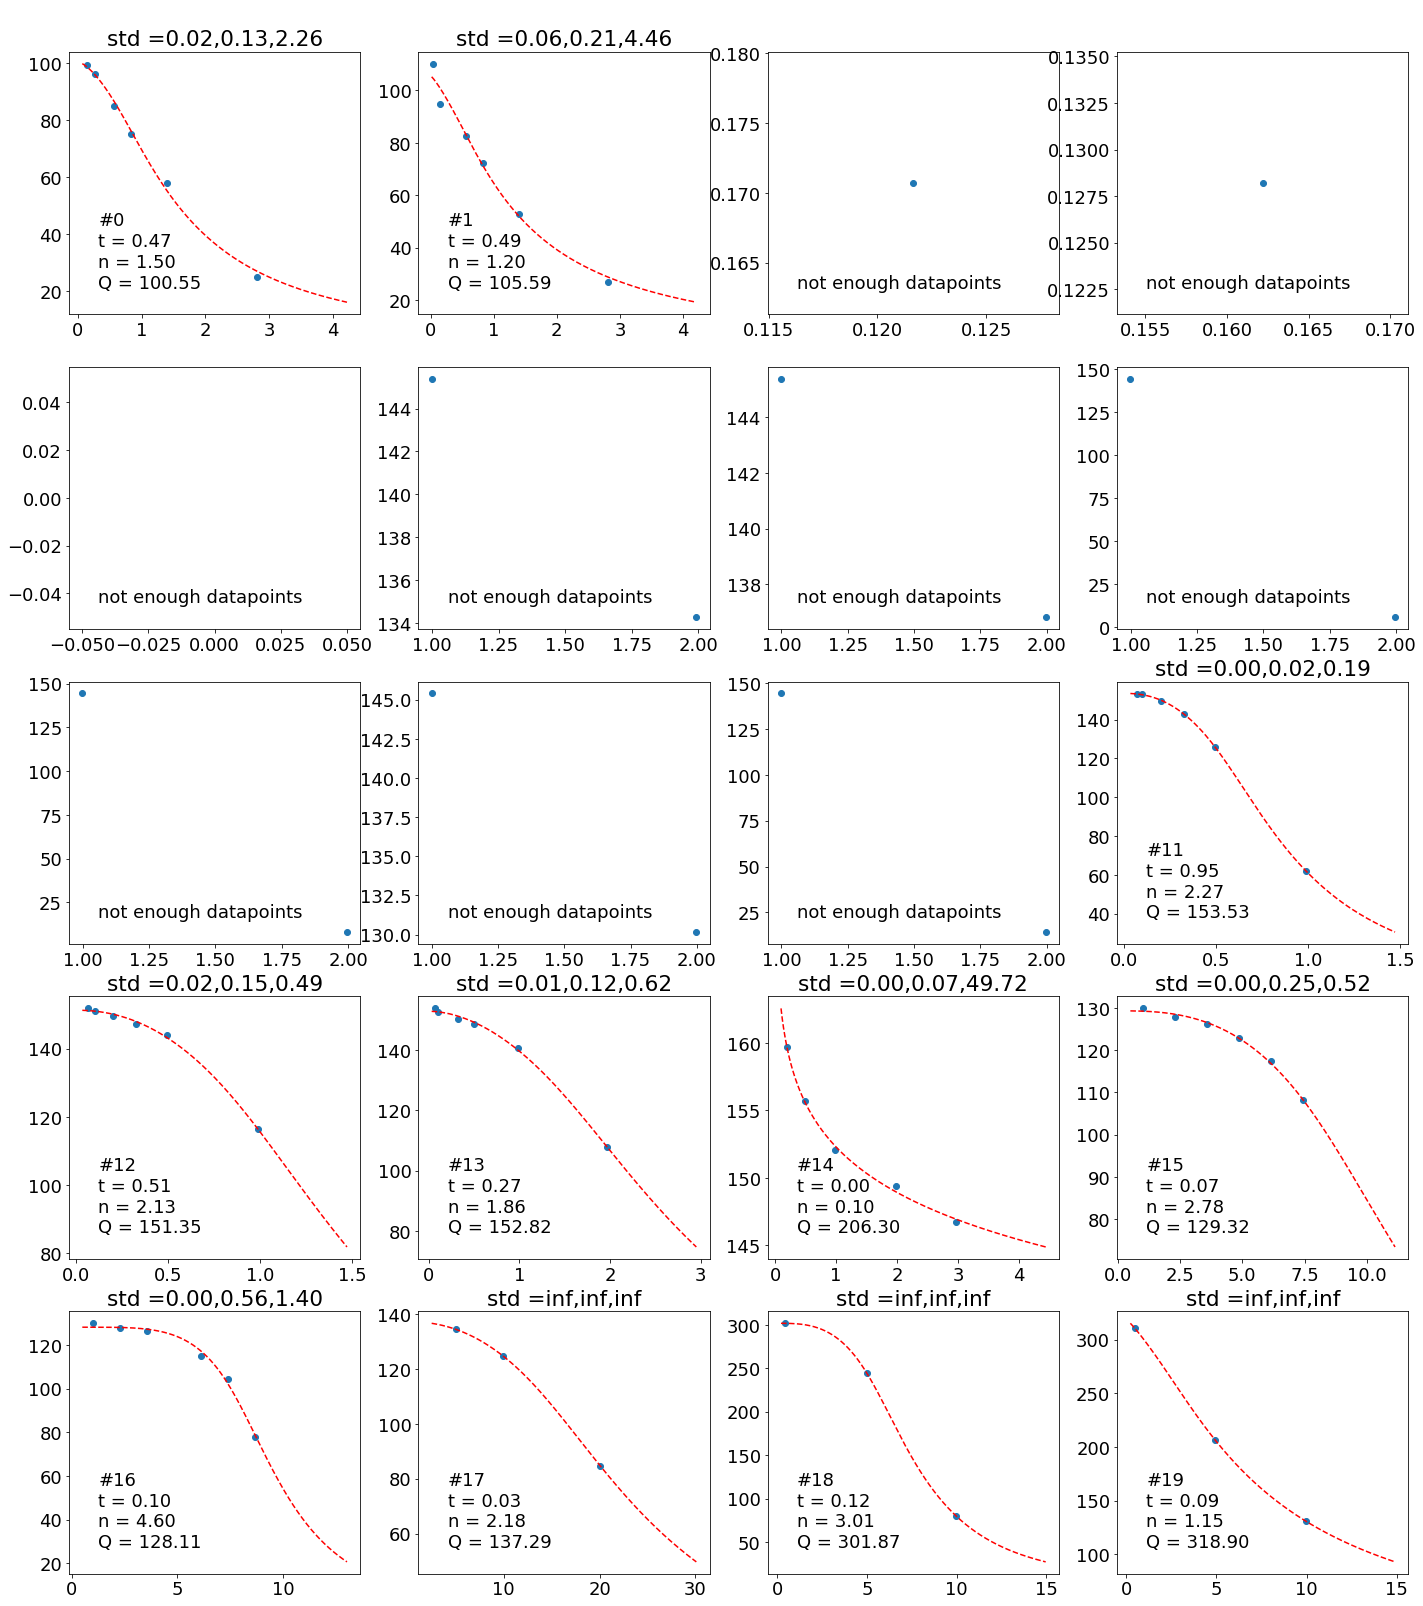

In [14]:
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(24,28))
#ax = fig.subplots(nrows=5,ncols=4)
list_of_t = []
list_of_n = []
list_of_Q = []

for i in range(int(len(df.columns)/2)):
    # choose the input and output variables
    R = df.iloc[:,2*i].values[1:]
    R = R[~pd.isnull(R)]
    y = df.iloc[:,2*i+1].values[1:]
    y = y[~pd.isnull(y)]
    if len(R)>=3:
        par, cov = curve_fit(objective, R, y, p0=[100,0.5,100])#, bounds=([-1, 0, 0],[np.inf, 10, 500]))
        t,n,Q = par
        #print("\n\n")
        #par_std(t, n, Q, cov)
        std = np.sqrt(np.diag(cov))
        labs = '#'+str(i)+'\nt = ' + f'{t:.2f}' +'\nn = ' + f'{n:.2f}' + '\nQ = ' + f'{Q:.2f}'
        ax = plt.subplot(5, 4, i+1, title= '\nstd =' + f'{std[0]:.2f}'+ ','+ f'{std[1]:.2f}'+ ',' + f'{std[2]:.2f}')
        plt.text(0.1, 0.1, labs, transform=ax.transAxes)
        #ax.legend(lab,fontsize=18)
        ax = plot_fit(R, y, t, n, Q)
    else:
        t = 0
        n = 0
        Q = 0
        ax = plt.subplot(5, 4, i+1)
        plt.text(0.1, 0.1, 'not enough datapoints', transform=ax.transAxes)
        ax = plt.scatter(R,y)
    
    list_of_t.append(t)
    list_of_n.append(n)
    list_of_Q.append(Q)


In [15]:
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(24,26))

R = df.iloc[:,18].values[1:]
R = R[~pd.isnull(R)]
y = df.iloc[:,19].values[1:]
y = y[~pd.isnull(y)]

par, cov = curve_fit(objective, R, y, p0=[100,1,100])
t,n,Q = par
std = np.sqrt(np.diag(cov))
labs = 't = ' + f'{t:.2f}' +'\nn = ' + f'{n:.2f}'+'\nQ = ' + f'{Q:.2f}'
ax = plt.subplot(5, 4, i+1)
plt.text(0.1, 0.1, labs, transform=ax.transAxes)
ax = plot_fit(R, y, t, n, Q)
print(std)

list_of_t[9] = t
list_of_n[9] = n
list_of_Q[9] = Q


TypeError: Improper input: N=3 must not exceed M=2

<Figure size 1728x1872 with 0 Axes>

In [ ]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(16,6))
ax = fig.subplots(nrows=1,ncols=2)

ax[0].hist(list_of_n)
ax[0].set_xlabel('n')
ax[0].set_ylabel('number of cases')
ax[1].hist(list_of_t)
ax[1].set_xlabel('t')
ax[1].set_ylabel('number of cases')

In [ ]:
geo_df= pd.read_excel('3D_Battery_Parameter_Log.xls', sheet_name='GeometryParameters')

In [16]:
geo_df

NameError: name 'geo_df' is not defined

In [17]:
thickness_df = geo_df[['Paper #','Set','Cathode \nThickness [µm]','Anode \nThickness [µm] ']]
thickness_df

NameError: name 'geo_df' is not defined